# Machine Learning
## LAB 3 - Linear regression with one and multiple variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from copy import deepcopy
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, linear_model

# Linear regression with one variable

In [2]:
path = os.getcwd() + '/Lab2_dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

##### 1. Use the head and describe function to examine the data and display few columns.

In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


##### 2. Plot and analyze the data, where: x - population, y - profit.

Text(0, 0.5, 'Profit')

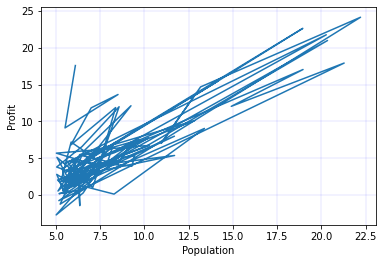

In [5]:
plt.plot(data['Population'], data['Profit'])
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.xlabel("Population")
plt.ylabel("Profit")

##### 3. In order to make this cost function work we need to insert a column of 1s at the beginning of the data frame.

In [6]:
data_ones = deepcopy(data)
data_ones.insert(0, "Offset", 1)

In [7]:
data_ones.head()

,Offset,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


##### 4. We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 3). Check with the head function if your implementation is correct:

In [8]:
X = data_ones[["Offset", "Population"]]
y = data_ones["Profit"]

In [9]:
X.head()

,Offset,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

##### 5. The goal of linear regression is to find a straight line which accurately represents the relationship between population and profit. This is called the hypothesis function and it’s formulated as 𝑓(𝑥)→𝐑: 

##### 6. The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X,y and parameter θ.

In [11]:
def computeCost(X_, y_, theta_):
    error_vector = np.power(np.dot(X_, theta.transpose())-y_, 2)
    error_sum    = np.sum(error_vector)
    return error_sum / (2*len(y_))

##### 7. Test the cost function with (θ=0).

In [12]:
X     = np.array(X.values)
y     = np.array(y.values)
theta = np.array([0.0,0.0], dtype=float)

In [13]:
print(computeCost(X, y, theta))

32.072733877455676


##### 8. Please implement the gradient descent algorithm:

In [14]:
def gradient_prosty(X_, y_, theta, alpha, it):
    cost = []
    for iteration in range(it):
        m                    = len(y_)
        error_vector         = np.dot(X_, theta.transpose()) - y_
        derivative_theta0    = (1/m) * np.sum(error_vector)
        theta[0]            -= alpha * derivative_theta0
        for i in range(1, theta.shape[0]):
            derivative_theta = (1/m) * np.sum(np.dot(error_vector, X_[:, i]))
            theta[i]        -= alpha * derivative_theta
        cost.append(computeCost(X_, y_, theta))
    return theta, cost

##### 9. Please calculate the optimal parameters for the dataset.
##### 10. Please calculate the cost function for the given (zad.8) θ.

In [15]:
theta = np.array([0.0,0.0], dtype=float)
alpha = 0.01
it    = 1000

theta, cost = gradient_prosty(X, y, theta, alpha, it)

In [16]:
theta

array([-3.24140214,  1.1272942 ])

##### 11. Plot the regression function and our dataset.

In [17]:
x_min = data['Population'].min()
x_max = data['Population'].max()
y_min = theta[0] + theta[1]*x_min
y_max = theta[0] + theta[1]*x_max

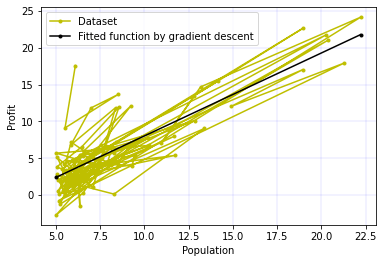

In [18]:
plt.plot(data['Population'], data['Profit'], 'y.-', label="Dataset")
plt.plot([x_min, x_max], [y_min, y_max], 'k.-', label="Fitted function by gradient descent")
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.xlabel("Population")
plt.ylabel("Profit")
plt.legend()

##### 12. Plot the relationship between the cost function and number of iterations.

Text(0, 0.5, 'Cost')

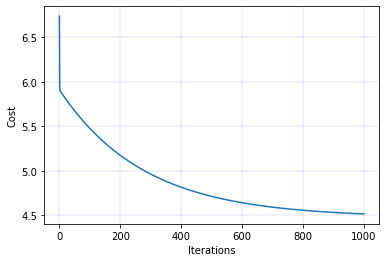

In [19]:
plt.plot(range(0, len(cost)), cost)
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.xlabel("Iterations")
plt.ylabel("Cost")

# Linear regression with one variable Linear regression with multiple variables
##### 1. Notice that the scale of the values for each variable is vastly different. A house will typically have 2-5 bedrooms but may have anywhere from hundreds to thousands of square feet. To fix this, we need to do something called “feature normalization”. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation (2 lines of code).

In [20]:
path         = os.getcwd() + '/Lab2_dane2.txt'
data_housing = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])

In [21]:
data_housing.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [22]:
data_housing.mean()

Size          2000.680851
Bedrooms         3.170213
Price       340412.659574
dtype: float64

In [23]:
data_housing.std()

Size           794.702354
Bedrooms         0.760982
Price       125039.899586
dtype: float64

In [24]:
data_housing -= data_housing.mean()
data_housing /= data_housing.std()

In [25]:
data_housing.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


##### 2. Please perform steps 3-11 from the previous task by using the same functions.
##### 3. In order to make this cost function work we need to insert a column of 1s at the beginning of the data frame.

In [26]:
data_housing_ones = deepcopy(data_housing)
data_housing_ones.insert(0, "Offset", 1)

In [27]:
data_housing_ones.head()

,Offset,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [28]:
X = data_housing_ones[["Offset", "Size", "Bedrooms"]]
y = data_housing_ones["Price"]

In [29]:
X.head()

,Offset,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [30]:
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: Price, dtype: float64

In [31]:
X = np.array(X.values)
y = np.array(y.values)

##### 7. Test the cost function with (θ=0).

In [32]:
theta = np.array([0.0, 0.0, 0.0], dtype=float)
print(computeCost(X, y, theta))

0.48936170212765967


##### 9. Please calculate the optimal parameters for the dataset.

In [33]:
alpha = 0.01
it    = 1000

theta, cost = gradient_prosty(X, y, theta, alpha, it)

In [34]:
theta

array([-1.04526317e-16,  8.78503652e-01, -4.69166570e-02])

##### 11. Plot the regression function and our dataset.

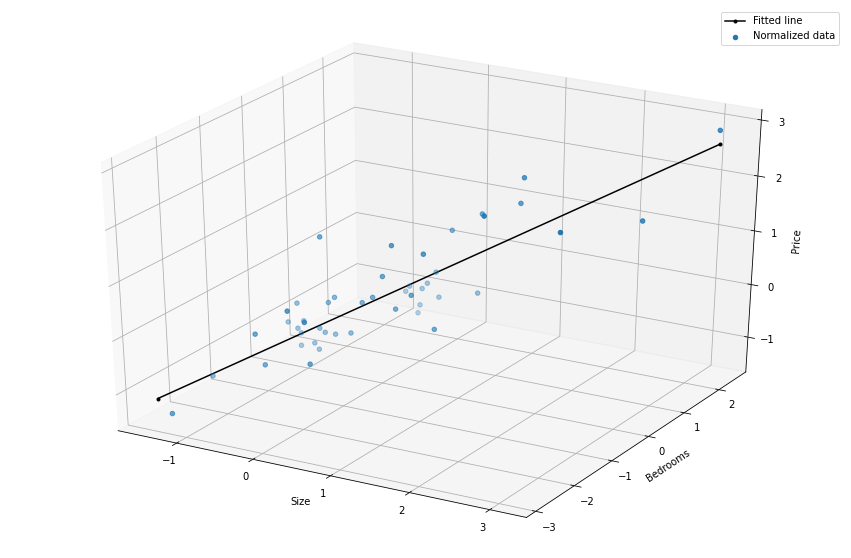

In [35]:
x = [data_housing['Size'].min(), data_housing['Size'].max()]
y = [data_housing['Bedrooms'].min(), data_housing['Bedrooms'].max()]
z = [theta[0] + theta[1]*x[0] + theta[2]*y[0], theta[0] + theta[1]*x[1] + theta[2]*y[1]]

fig = plt.figure(figsize=(15, 10))
ax  = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data_housing['Size'], ys=data_housing['Bedrooms'], zs=data_housing['Price'], s=20, label="Normalized data")
ax.plot(x, y, z, 'k.-', label="Fitted line")

ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.legend()

plt.show()

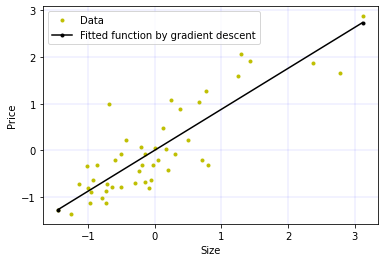

In [36]:
x_min = data_housing['Size'].min()
x_max = data_housing['Size'].max()
y_min = theta[0] + theta[1]*x_min
y_max = theta[0] + theta[1]*x_max


plt.plot(data_housing['Size'], data_housing['Price'], 'y.', label="Data")
plt.plot([x_min, x_max], [y_min, y_max], 'k.-', label="Fitted function by gradient descent")
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.xlabel("Size")
plt.ylabel("Price")
plt.legend()

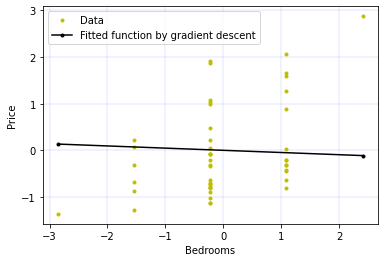

In [37]:
x_min = data_housing['Bedrooms'].min()
x_max = data_housing['Bedrooms'].max()
y_min = theta[0] + theta[2]*x_min
y_max = theta[0] + theta[2]*x_max


plt.plot(data_housing['Bedrooms'], data_housing['Price'], 'y.', label="Data")
plt.plot([x_min, x_max], [y_min, y_max], 'k.-', label="Fitted function by gradient descent")
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.legend()

##### 12. Plot the relationship between the cost function and number of iterations.

Text(0.5, 0, 'Iterations')

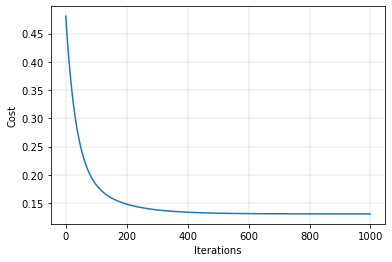

In [38]:
plt.plot(range(0, len(cost)), cost)
plt.ylabel("Cost")
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.xlabel("Iterations")

# Exercise - Boston database

In [39]:
boston = datasets.load_boston()
items_in_database = boston.data.shape[0]

##### 1. Divide the database into training and testing.

In [40]:
X_train = boston.data[:int(0.7*items_in_database), :]
Y_train = boston.target[:int(0.7*items_in_database)]

X_test = boston.data[int(0.7*items_in_database):, :]
Y_test = boston.target[int(0.7*items_in_database):]

##### 2. According to the above example, please implement linear regression model for the dataset. Please calculate the statistical metrics for the model including MSE and R2?

In [41]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [42]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 1.29693856  0.01469497  0.04050457  0.79060732 -9.12933243  9.24839787
 -0.0451214  -0.91395374  0.14079658 -0.01477291 -0.63369567  0.01577172
 -0.09514128]


In [43]:
Y_predicted = regr.predict(X_test)
error = np.mean((regr.predict(X_test) - Y_test) ** 2)

In [44]:
print("Residual sum of squares: {}".format(error))

Residual sum of squares: 546.9193565310729


##### 3. Plot the linear regression for each atribute in the Boston dataset.

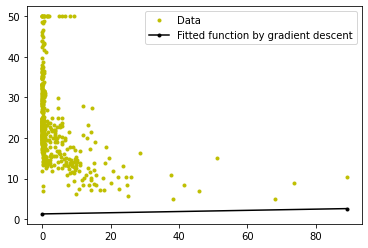

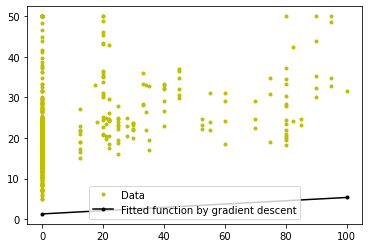

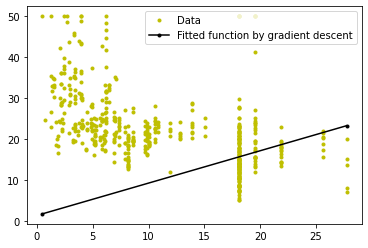

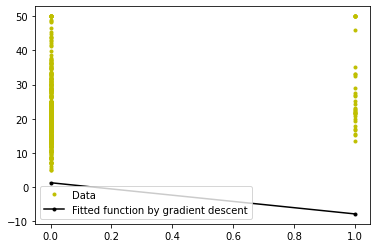

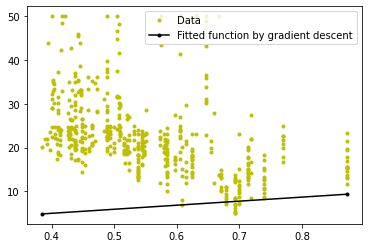

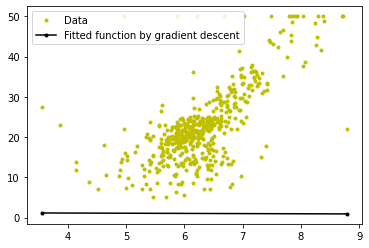

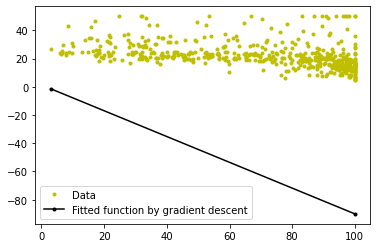

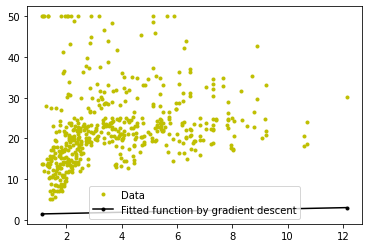

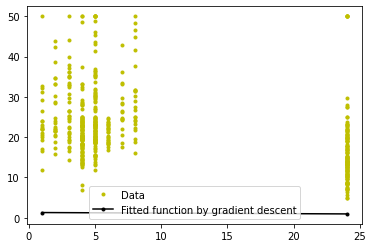

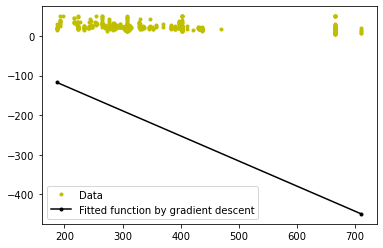

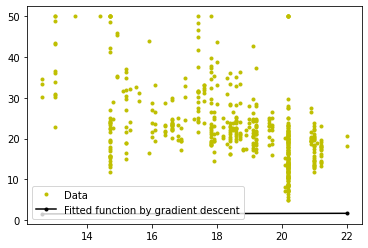

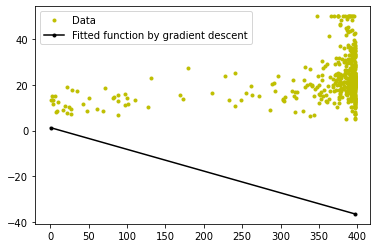

In [45]:
for idx in range(12):
    x_min = boston.data[:, idx].min()
    x_max = boston.data[:, idx].max()
    y_min = regr.coef_[0] + regr.coef_[idx+1]*x_min
    y_max = regr.coef_[0] + regr.coef_[idx+1]*x_max

    plt.plot(boston.data[:, idx], boston.target, 'y.', label="Data")
    plt.plot([x_min, x_max], [y_min, y_max], 'k.-', label="Fitted function by gradient descent")
    plt.legend()
    plt.show()